In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels as sm
import plotnine as p9
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('cinemaTicket_Ref.csv')
df.head(5)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [4]:
#Dropping the cinema code as well as the film code and date variable. Without more context to these variables, they were deemed unecessary to the assessment since they appeared to give little information deemed helpful
df = df.drop(columns = ['film_code', 'cinema_code', 'date'])

In [5]:
#Check to make sure there were no nulls
df.isnull().sum()

total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64

In [6]:
df.duplicated().sum()

657

In [7]:
df.drop_duplicates()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,3900000,26,0,4,4.26,150000.000000,26,610.328638,5,2,5
1,3360000,42,0,5,8.08,80000.000000,42,519.801980,5,2,5
2,2560000,32,0,4,20.00,80000.000000,32,160.000000,5,2,5
3,1200000,12,0,1,11.01,100000.000000,12,108.991826,5,2,5
4,1200000,15,0,3,16.67,80000.000000,15,89.982004,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...
142518,2420000,18,1,3,24.00,134444.444444,17,75.000000,11,4,4
142519,1320000,22,0,2,3.86,60000.000000,22,569.948187,11,4,4
142520,1200000,15,0,1,65.22,80000.000000,15,22.999080,11,4,4
142521,1060000,8,0,3,9.20,132500.000000,8,86.956522,11,4,4


In [8]:
#Summary statistics of the variables determined to be used in the analysis
df.describe()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


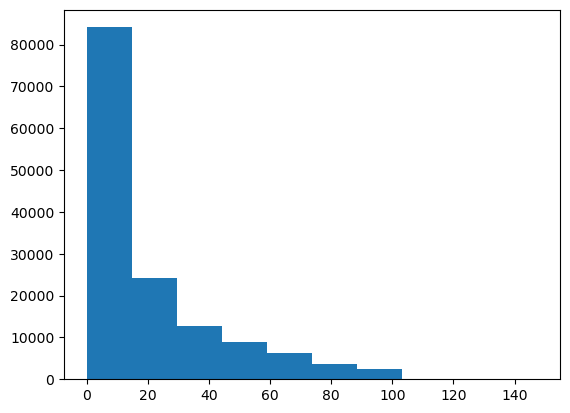

In [9]:
#Histogram to determine the distribution of the variable that contained null values in order to determine how to handle the missing value
plt.hist(df['occu_perc'])
plt.show()

(array([1.03439e+05, 2.42210e+04, 7.88400e+03, 4.16500e+03, 1.35000e+03,
        6.42000e+02, 4.57000e+02, 2.18000e+02, 2.00000e+01, 3.00000e+00]),
 array([-2.00000000e+00,  9.67409716e+02,  1.93681943e+03,  2.90622915e+03,
         3.87563886e+03,  4.84504858e+03,  5.81445830e+03,  6.78386801e+03,
         7.75327773e+03,  8.72268744e+03,  9.69209716e+03]),
 <BarContainer object of 10 artists>)

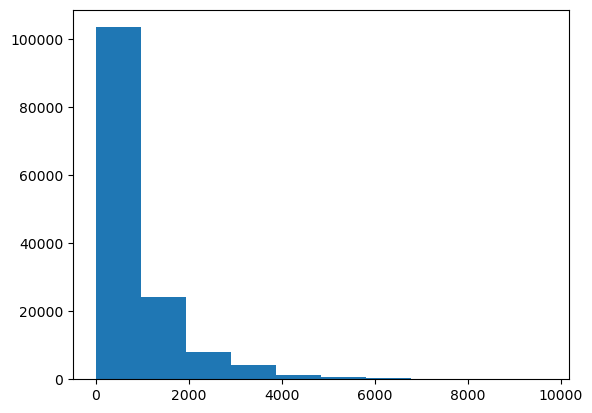

In [10]:
#Checking the distribution to see how to handle the null values
plt.hist(df['capacity'])

In [11]:
#Due to the skew distribution, median was the best choice to fill the null values
df['occu_perc'].fillna(df['occu_perc'].median(), inplace = True)

In [12]:
df['capacity'].fillna(df['capacity'].median(), inplace = True)

In [13]:
df.isnull().sum()

total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   total_sales   142524 non-null  int64  
 1   tickets_sold  142524 non-null  int64  
 2   tickets_out   142524 non-null  int64  
 3   show_time     142524 non-null  int64  
 4   occu_perc     142524 non-null  float64
 5   ticket_price  142524 non-null  float64
 6   ticket_use    142524 non-null  int64  
 7   capacity      142524 non-null  float64
 8   month         142524 non-null  int64  
 9   quarter       142524 non-null  int64  
 10  day           142524 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 12.0 MB


In [15]:
df.describe()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,1.425240e+05,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000
mean,1.234728e+07,140.137570,0.237413,3.932103,19.957553,81234.599886,139.900157,854.435049,6.776852,2.634721,16.112585
std,3.065486e+07,279.758733,2.923206,3.056276,22.645298,33236.599278,279.564935,952.749826,2.195843,0.809692,8.949471
min,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1.260000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,277.777778,5.000000,2.000000,8.000000
50%,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1.110000e+07,143.000000,0.000000,5.000000,28.190000,100000.000000,143.000000,1037.746584,9.000000,3.000000,24.000000
max,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


In [16]:
#Can't have a negative capacity so any capacity less than 0 was dropped and had to round since you can't have a percentage of a person
df = df.drop(df[df['capacity'] < 0].index)
df.capacity = df.capacity.round()
df.describe()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,1.424700e+05,142470.000000,142470.000000,142470.000000,142470.000000,142470.000000,142470.000000,142470.000000,142470.000000,142470.00000,142470.000000
mean,1.235096e+07,140.167481,0.237257,3.932821,19.965117,81244.927783,139.930224,854.759760,6.775693,2.63426,16.113252
std,3.066005e+07,279.803415,2.923458,3.056628,22.646255,33237.598972,279.609650,952.782256,2.195405,0.80946,8.949518
min,2.000000e+04,1.000000,0.000000,1.000000,0.030000,483.870968,-219.000000,10.000000,2.000000,1.00000,1.000000
25%,1.270000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,280.000000,5.000000,2.00000,8.000000
50%,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79476.923000,50.000000,526.000000,7.000000,3.00000,16.000000
75%,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.000000,9.000000,3.00000,24.000000
max,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.000000,11.000000,4.00000,31.000000


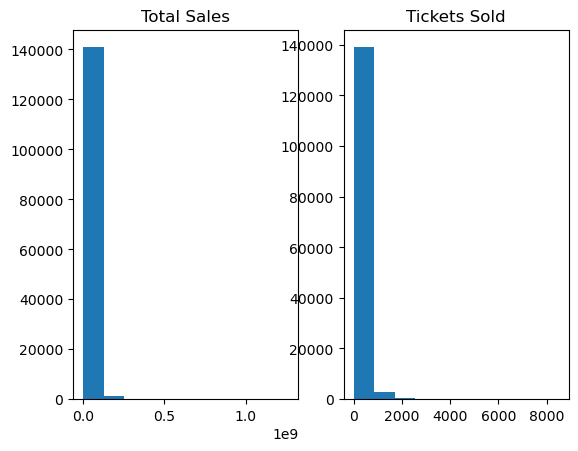

In [17]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['total_sales'])
axis[0].set_title("Total Sales")
axis[1].hist(df['tickets_sold'])
axis[1].set_title('Tickets Sold')
plt.show()

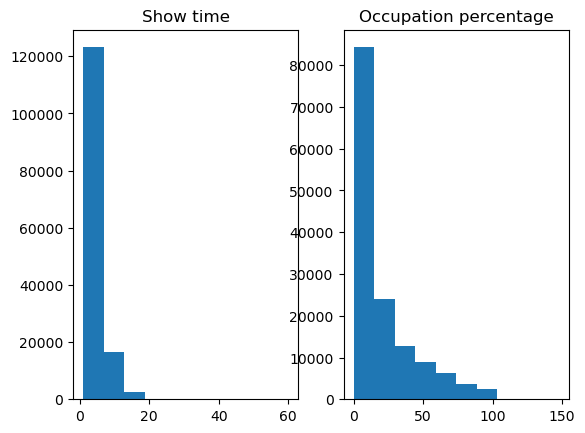

In [18]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['show_time'])
axis[0].set_title("Show time")
axis[1].hist(df['occu_perc'])
axis[1].set_title('Occupation percentage')
plt.show()

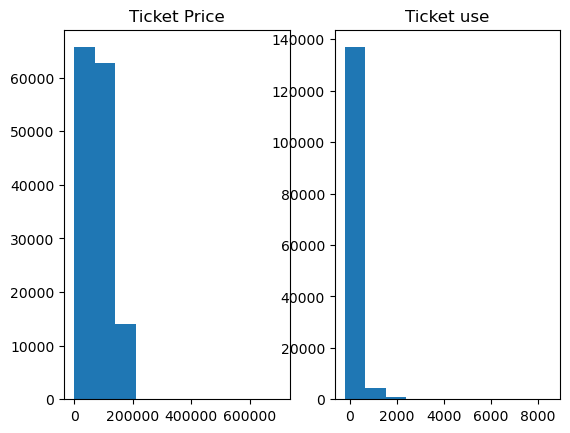

In [19]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['ticket_price'])
axis[0].set_title("Ticket Price")
axis[1].hist(df['ticket_use'])
axis[1].set_title('Ticket use')
plt.show()

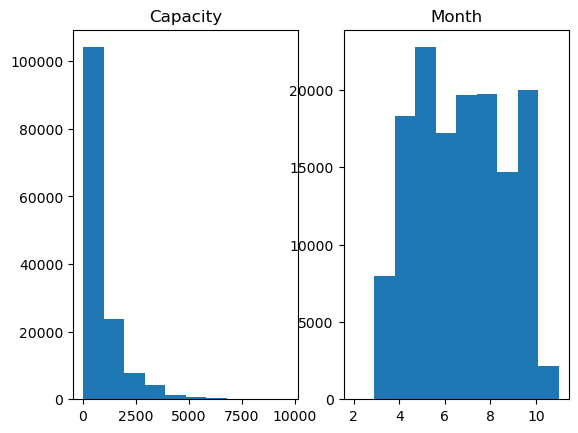

In [20]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['capacity'])
axis[0].set_title("Capacity")
axis[1].hist(df['month'])
axis[1].set_title('Month')
plt.show()

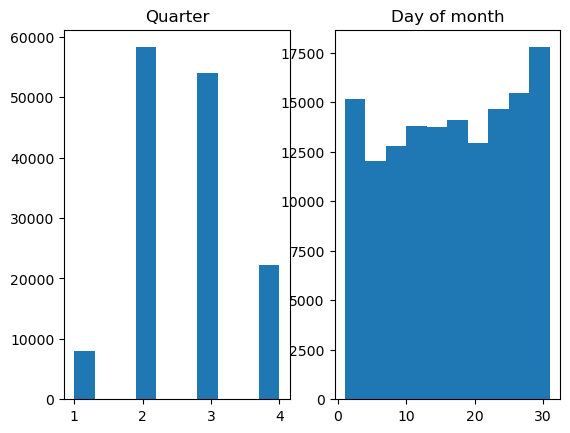

In [21]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['quarter'])
axis[0].set_title("Quarter")
axis[1].hist(df['day'])
axis[1].set_title('Day of month')
plt.show()

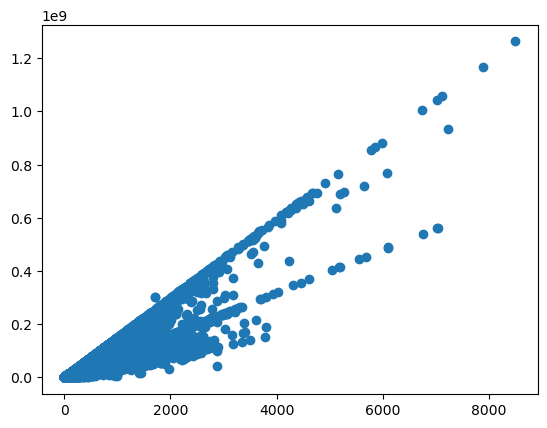

In [22]:
plt.scatter(df.tickets_sold, df.total_sales)

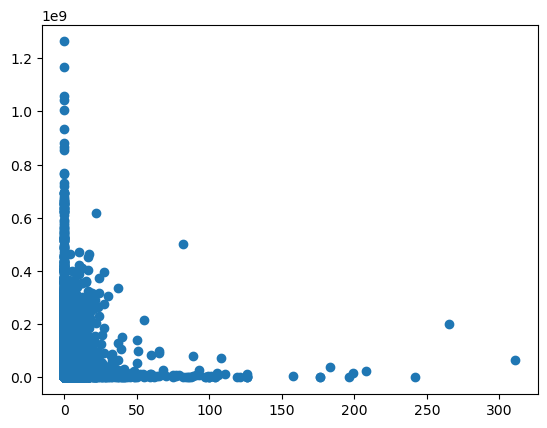

In [23]:
plt.scatter(df.tickets_out, df.total_sales)

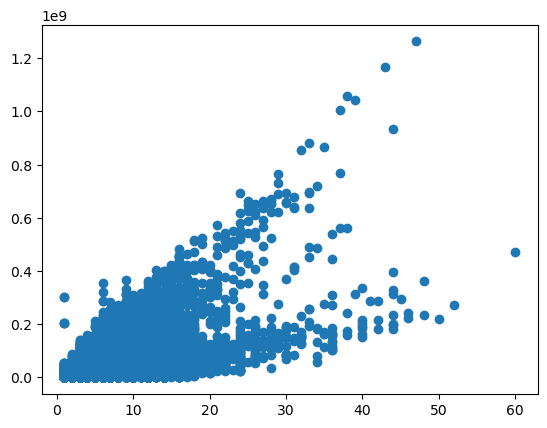

In [24]:
plt.scatter(df.show_time, df.total_sales)

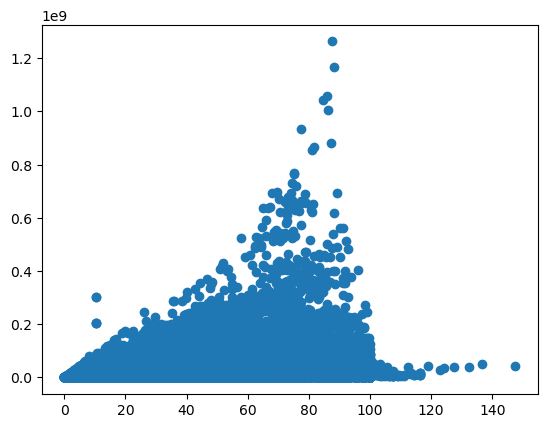

In [25]:
plt.scatter(df.occu_perc, df.total_sales)

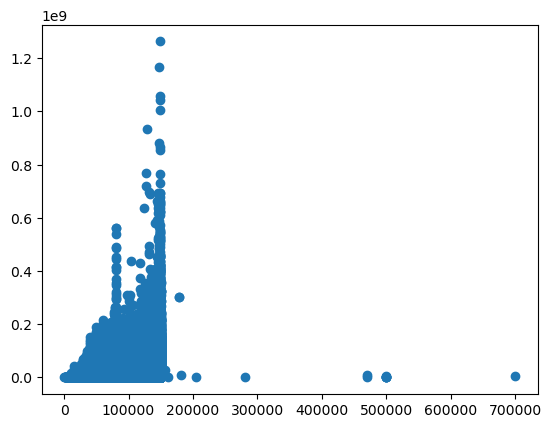

In [26]:
plt.scatter(df.ticket_price, df.total_sales)

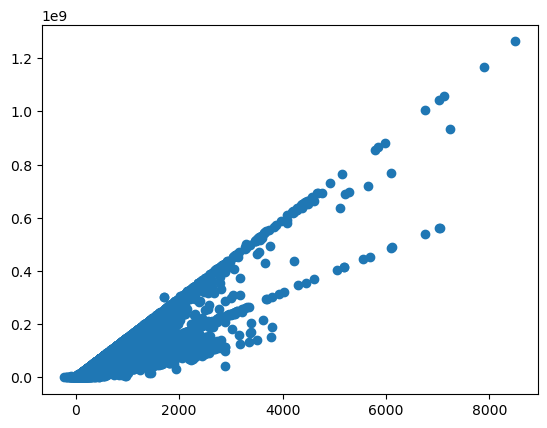

In [27]:
plt.scatter(df.ticket_use, df.total_sales)

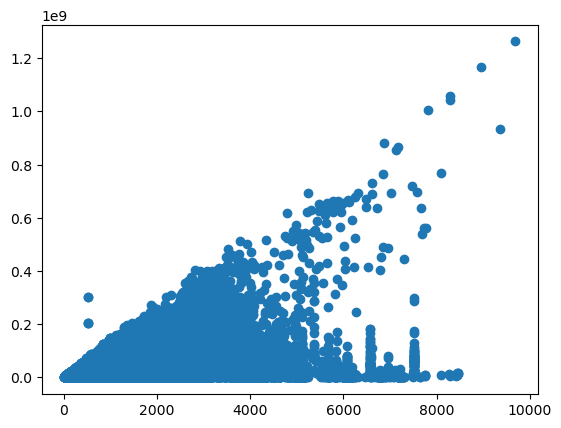

In [28]:
plt.scatter(df.capacity, df.total_sales)

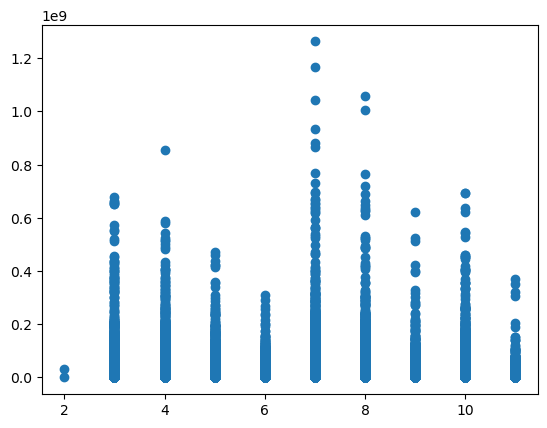

In [29]:
plt.scatter(df.month, df.total_sales)

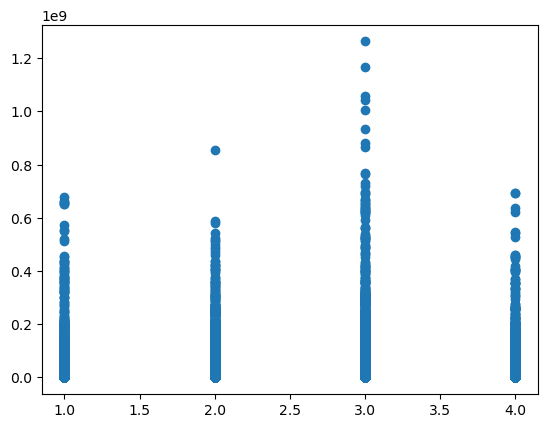

In [30]:
plt.scatter(df.quarter, df.total_sales)

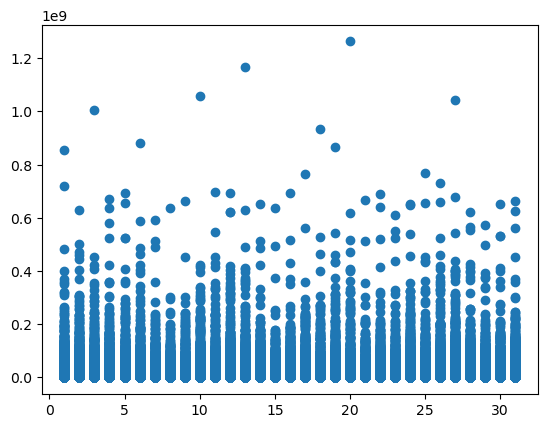

In [31]:
plt.scatter(df.day, df.total_sales)

In [32]:
X = df[['tickets_sold', 'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use', 'capacity', 'month', 'quarter', 'day']]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

C:\Users\jorda\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide


        feature         VIF
0  tickets_sold         inf
1   tickets_out         inf
2     show_time    5.911633
3     occu_perc    2.756977
4  ticket_price    6.185064
5    ticket_use         inf
6      capacity    3.907061
7         month   97.465336
8       quarter  101.806115
9           day    3.401630


<AxesSubplot:>

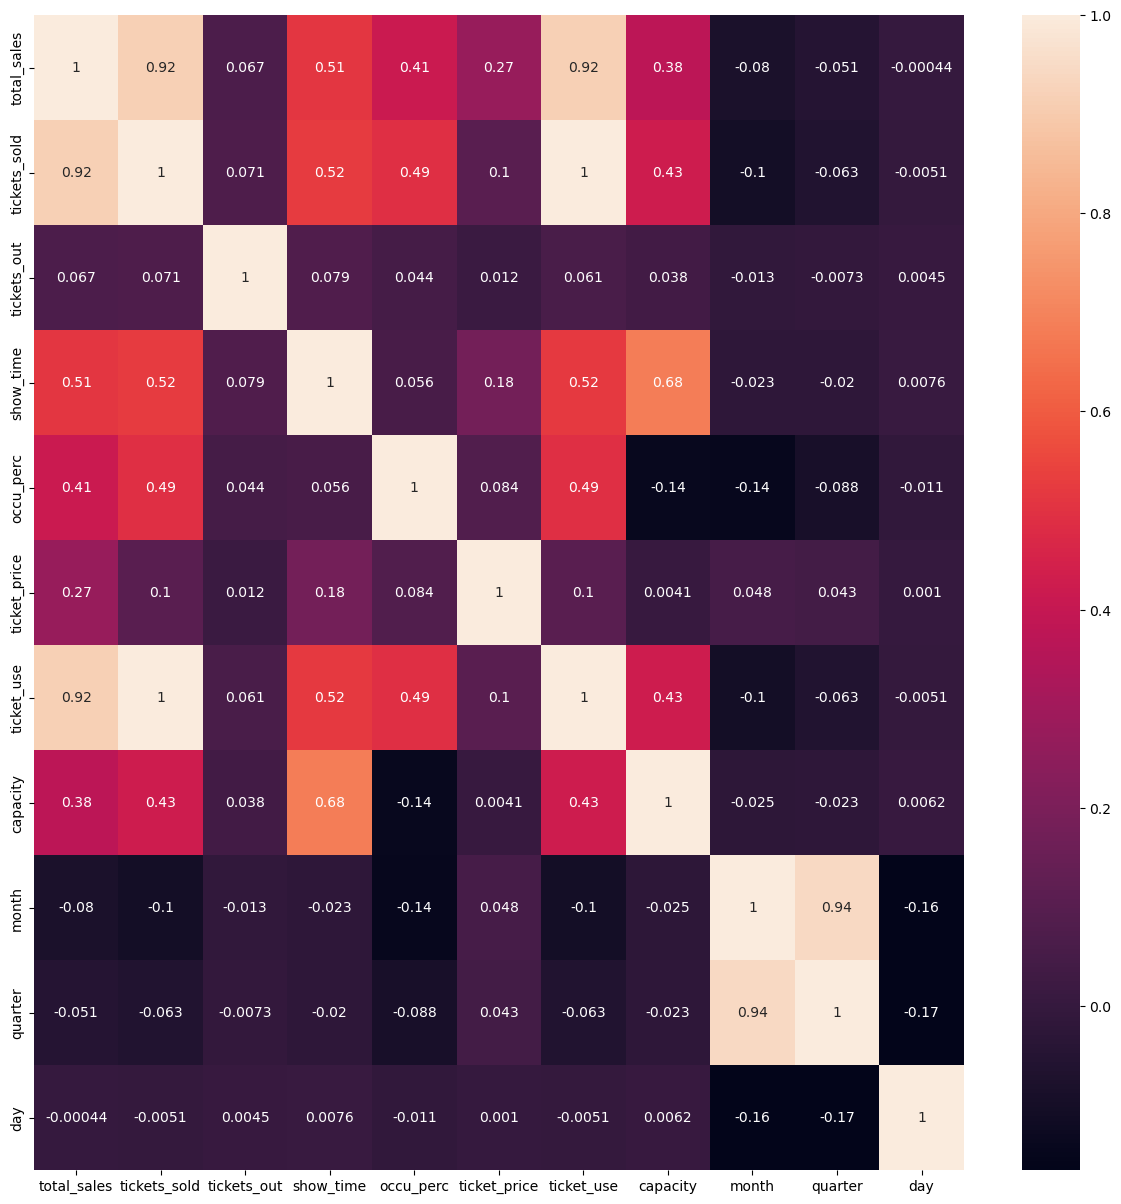

In [33]:
#Checking the correlation for a better understanding due to some VIF being 'inf'
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [34]:
df_model = ols('total_sales ~ ticket_price + occu_perc + show_time + tickets_sold + ticket_use + capacity + day', data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.405e+05
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:28:49   Log-Likelihood:            -2.5109e+06
No. Observations:              142470   AIC:                         5.022e+06
Df Residuals:                  142462   BIC:                         5.022e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.306e+07   1.02e+05   -127.825   

In [35]:
reduced_model = ols('total_sales ~ ticket_price + occu_perc + show_time + tickets_sold + capacity  + day', data = df).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.639e+05
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:28:49   Log-Likelihood:            -2.5109e+06
No. Observations:              142470   AIC:                         5.022e+06
Df Residuals:                  142463   BIC:                         5.022e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.306e+07   1.02e+05   -127.832   